# Logistic Regression :

## Logistic Regression is not regression at all, in fact It is a form of Classification, which evaluates the output values generated as per a LOGIT function and then, feeds this to calculate the probability of these, then plotting as per the SIGMUND Function

 **Logistic Regression is used when the dependent variable(target) is categorical**

<img src="images/download.jpg" width="400" height="600">

# Model

-  Output = 0 or 1
-  Hypothesis => Z = WX + B
-  hΘ(x) = sigmoid (Z)
-  Sigmoid Function

<img src="images/a.png" height=600 width=600 >

#### If ‘Z’ goes to infinity, Y(predicted) will become 1 and if ‘Z’ goes to negative infinity, Y(predicted) will become 0.

<img src="images/sigmoid.PNG" width="40%"/>

## With this, Estimated Probability is calculated. This estimated probability is used to avoid confusion generated by Linear Regression, which can classify the data as non-malignant, leading to Errors and Lower Accuracy.

# Analysis of the hypothesis

The output from the hypothesis is the estimated probability. This is used to infer how confident can predicted value be actual value when given an input X. Consider the below example,

X = [x0 x1] = [1 IP-Address]

Based on the x1 value, let’s say we obtained the estimated probability to be 0.8. This tells that there is 80% chance that an email will be spam.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
Data=pd.read_csv("dataset/train.csv")

###  The above Dataset used is the Titanic Dataset which tells us about the report on various parameters on passengers of the Titanic.

In [36]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
Data.shape

(891, 12)

### In these, we will try to classify whether the Person Lived or not, by encoding it as 1 or 0. Also we will drop many of these and only keep a few parameters with us.

<img src="images/log.png" />

In [38]:
Data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

#### Of these, we need to keep only Sex, Age and Survived (whether did or didnot). Reflecting the changes.

In [39]:
X = pd.DataFrame()
X['sex']=Data['Sex']
X['age']=Data['Age']
X['survived']=Data['Survived']

In [40]:
X.shape

(891, 3)

In [41]:
X.head()

,sex,age,survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1
3,female,35.0,1
4,male,35.0,0


In [42]:
X.isnull().sum()

sex           0
age         177
survived      0
dtype: int64

## Since we have many null entries, we will try to eliminate all of those

In [43]:
X.dropna(inplace=True)

## The above rows were dropped

In [44]:
X.shape

(714, 3)

## ENCODING the male and females, we use the get_dummies method

In [46]:
X['sex']=pd.get_dummies(X.sex)['female']

In [47]:
X.head()

,sex,age,survived
0,0,22.0,0
1,1,38.0,1
2,1,26.0,1
3,1,35.0,1
4,0,35.0,0


In [48]:
import seaborn as sb

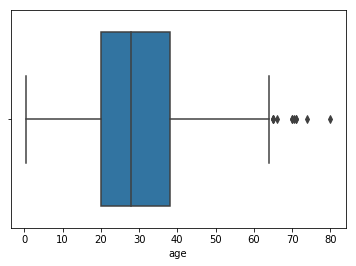

In [51]:
sb.boxplot(X.age)
plt.show()

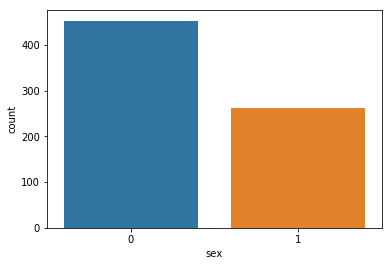

In [54]:
sb.countplot(X.sex)
plt.show()

## Classification and training the Data.

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression(penalty='l2',C=1)
#penalty is a regularization parameter which is l1 and l2 
#how strong is regularization is depends on parameter C

In [63]:
In=X.iloc[:,:2]
Out=X.iloc[:,2]
In.head()
Out.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(In,Out,random_state=2,test_size=.2)

In [65]:
X_train.shape

(571, 2)

In [66]:
Y_train.shape

(571L,)

In [67]:
model.fit(X_train,Y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

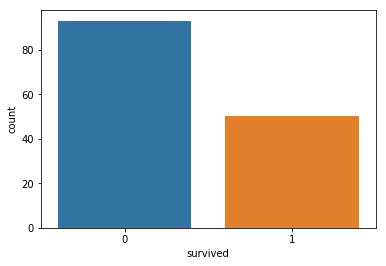

In [70]:
sb.countplot(Y_test)
plt.show()

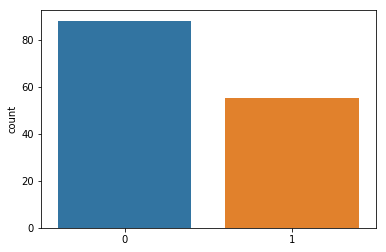

In [72]:
sb.countplot(model.predict(X_test))
plt.show()

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(Y_test,model.predict(X_test))

0.83916083916083917

In [75]:
accuracy_score(Y_train,model.predict(X_train))

0.76532399299474607

## Thus as we see this shows us how Logistic Regression is done.